# Resultados

## Modelo de clasificación Binaria 

Found 1732 images belonging to 2 classes.


/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 48s 858ms/step
              precision    recall  f1-score   support

     Clase 0       0.95      0.93      0.94      1017
     Clase 1       0.90      0.93      0.92       715

    accuracy                           0.93      1732
   macro avg       0.93      0.93      0.93      1732
weighted avg       0.93      0.93      0.93      1732



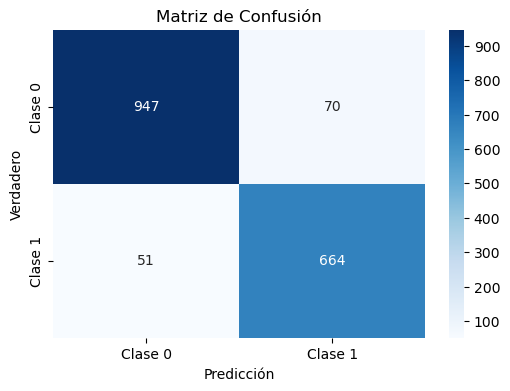

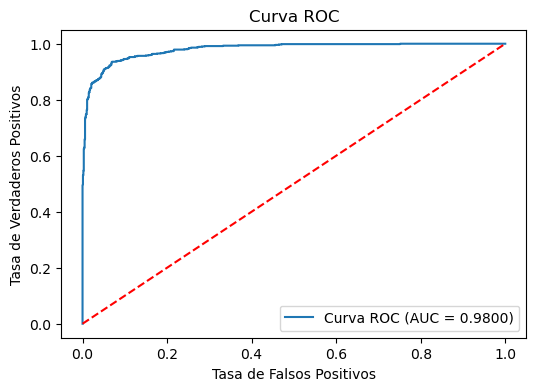

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_2clases = load_model('modelosFinales/xception_clasificacion2clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_2classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_2clases.predict(test_generator)

# Convertir probabilidades a etiquetas binarias
y_pred = (y_pred_proba > 0.8).astype(int)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Calcular las métricas de evaluación
print(classification_report(y_true, y_pred, target_names=['Clase 0', 'Clase 1']))

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
roc_auc = roc_auc_score(y_true, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular Accuracy, Precision, Recall y F1-Score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Extraer los valores de la matriz de confusión
TN, FP, FN, TP = cm.ravel()

# Calcular el False Negative Rate (FNR)
fnr = FN / (FN + TP)

print(f'False Negative Rate (FNR): {fnr:.2f}')

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93
False Negative Rate (FNR): 0.07


## Modelo de clasificación 3 clases 

Found 1732 images belonging to 3 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step
Reporte de Clasificación:
              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      1017
  high_grade       0.88      0.91      0.89       420
   low_grade       0.75      0.69      0.72       295

    accuracy                           0.88      1732
   macro avg       0.85      0.84      0.84      1732
weighted avg       0.88      0.88      0.88      1732



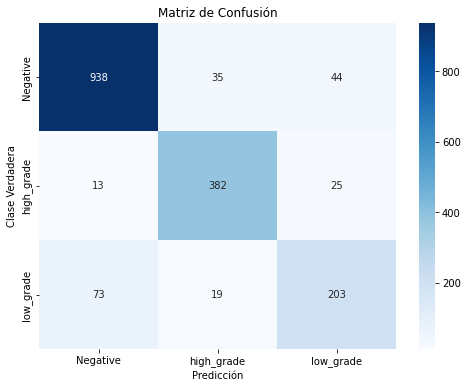

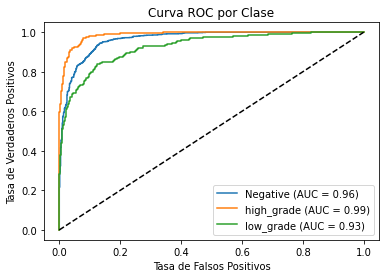

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_3clases = load_model('modelosFinales/xception_clasificacion3clases.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_3classes/test',  # Cambia a la carpeta correspondiente
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_3clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Verificar que las dimensiones coincidan entre las etiquetas verdaderas y las predicciones
y_true_corrected = y_true[:len(y_pred)]

# Calcular las métricas de evaluación
print("Reporte de Clasificación:")
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

# Graficar la curva ROC por clase
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calcular el AUC Micro
y_true_binary = tf.keras.utils.to_categorical(y_true_corrected, num_classes=len(class_labels))
fpr_micro, tpr_micro, _ = roc_curve(y_true_binary.ravel(), y_pred_proba.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc_micro:.2f}")

Labels are not in one-hot encoded format.
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.88
AUC: 0.97


## Modelo de clasificación 5 clases 

Found 715 images belonging to 5 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step
              precision    recall  f1-score   support

       ASC-H       0.84      0.86      0.85       139
      ASC-US       0.71      0.62      0.66        91
        HSIL       0.89      0.91      0.90       256
        LSIL       0.81      0.83      0.82       204
         SCC       0.73      0.64      0.68        25

    accuracy                           0.83       715
   macro avg       0.79      0.77      0.78       715
weighted avg       0.83      0.83      0.83       715



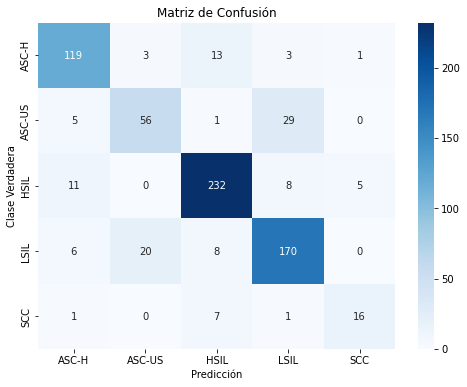

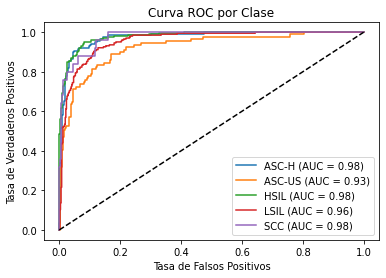

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_5clases = load_model('modelosFinales/xception_clasificacion5clases_augx2.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_5classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_5clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Corregir las etiquetas verdaderas para alinear con y_pred
y_true_corrected = np.array([y for _, y in sorted(zip(test_generator.filenames, y_true))])

# Calcular las métricas de evaluación
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase con el mejor threshold
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calcular AUC Micro
y_true_binary = tf.keras.utils.to_categorical(y_true, num_classes=len(test_generator.class_indices))
fpr_micro, tpr_micro, _ = roc_curve(y_true_binary.ravel(), y_pred_proba.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc_micro:.2f}")

Labels are not in one-hot encoded format.
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-Score: 0.83
AUC: 0.97


## Modelo de clasificación 6 clases

Found 1732 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step
              precision    recall  f1-score   support

       ASC-H       0.79      0.77      0.78       139
      ASC-US       0.59      0.44      0.50        91
        HSIL       0.84      0.84      0.84       256
        LSIL       0.69      0.65      0.67       204
    Negative       0.90      0.94      0.92      1017
         SCC       0.75      0.60      0.67        25

    accuracy                           0.85      1732
   macro avg       0.76      0.71      0.73      1732
weighted avg       0.84      0.85      0.84      1732



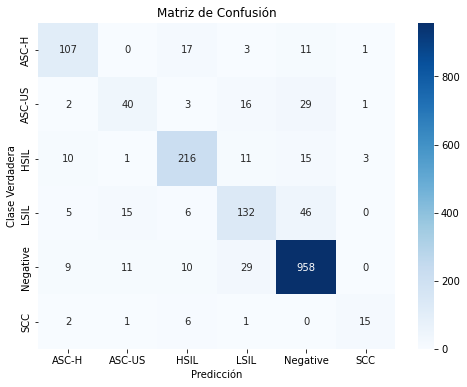

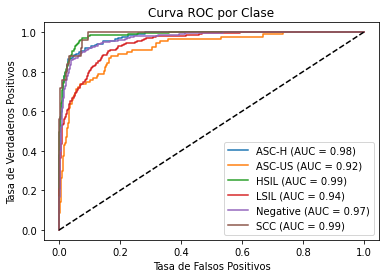

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, accuracy_score, precision_score, recall_score, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargar el modelo guardado sin compilar
modelo_6clases = load_model('modelosFinales/xception_clasificacion6clases_balanceado.keras', compile=False)

# Configura el generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'crops_6classes/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Asegúrate de que el class_mode sea el correcto según tu modelo
    shuffle=False
)

# Predecir las probabilidades en el conjunto de prueba
y_pred_proba = modelo_6clases.predict(test_generator)

# Convertir probabilidades a etiquetas categóricas
y_pred = np.argmax(y_pred_proba, axis=1)

# Obtener las etiquetas verdaderas
y_true = test_generator.classes

# Obtener las clases
class_labels = list(test_generator.class_indices.keys())

# Corregir las etiquetas verdaderas para alinear con y_pred
y_true_corrected = np.array([y for _, y in sorted(zip(test_generator.filenames, y_true))])

# Calcular las métricas de evaluación
print(classification_report(y_true_corrected, y_pred, target_names=class_labels))

# Crear la matriz de confusión
cm = confusion_matrix(y_true_corrected, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()

# Calcular la curva ROC y el AUC para cada clase con el mejor threshold
fpr, tpr, roc_auc = {}, {}, {}
for i, class_name in enumerate(class_labels):
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_corrected == i, y_pred_proba[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])
    plt.plot(fpr[class_name], tpr[class_name], label=f'{class_name} (AUC = {roc_auc[class_name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc='lower right')
plt.show()

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Check if labels are one-hot encoded and convert if necessary
if test_generator.class_mode == 'categorical':
    if test_generator.labels.ndim == 2:
        y_true = np.argmax(test_generator.labels, axis=1)
    else:
        print("Labels are not in one-hot encoded format.")

# Calcular métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Calcular AUC Micro
y_true_binary = tf.keras.utils.to_categorical(y_true, num_classes=len(test_generator.class_indices))
fpr_micro, tpr_micro, _ = roc_curve(y_true_binary.ravel(), y_pred_proba.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

# Imprimir métricas
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc_micro:.2f}")

Labels are not in one-hot encoded format.
Accuracy: 0.85
Precision: 0.84
Recall: 0.85
F1-Score: 0.84
AUC: 0.98


## Clasificación Binario -> Clasificación 5 Clases

Found 1732 images belonging to 2 classes.


/Users/achula/miniconda3/envs/proyecto_final/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 49s 887ms/step


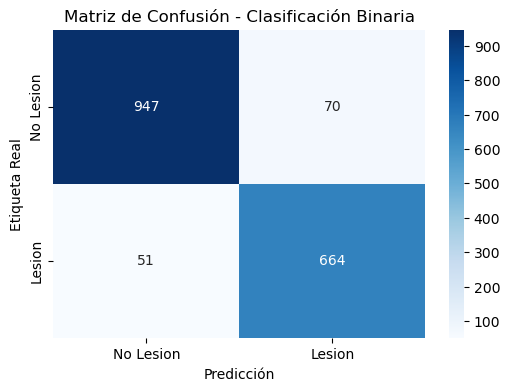

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━

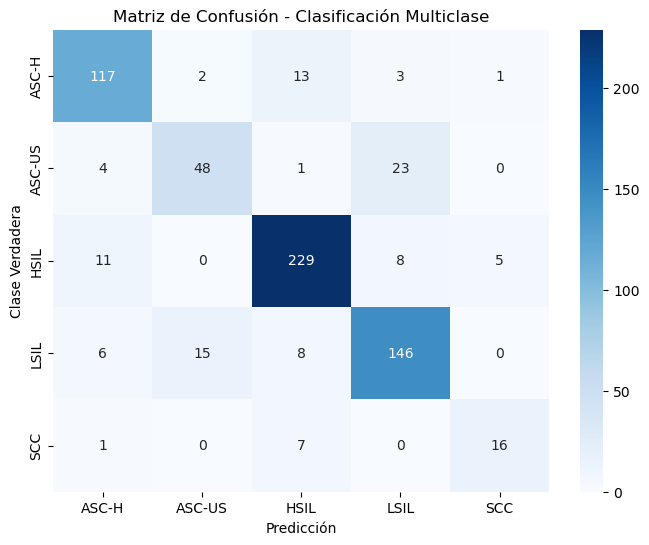

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━

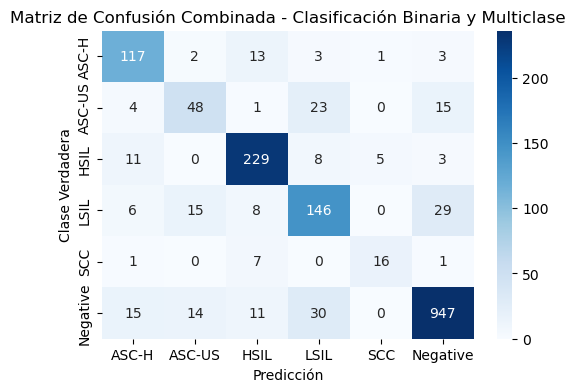

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Cargar modelos
binary_model = tf.keras.models.load_model('modelosFinales/xception_clasificacion2clases.keras', compile=False)
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

five_classes_model = tf.keras.models.load_model('modelosFinales/xception_clasificacion5clases_augx2.keras', compile=False)
five_classes_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                           loss='categorical_crossentropy',
                           metrics=['accuracy', 'Precision', 'Recall', 'AUC'])

# Directorio de prueba
test_dir = 'crops/test'

# Configuración del generador de imágenes para el conjunto de prueba
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Evaluar y clasificar usando el modelo binario
binary_predictions = (binary_model.predict(test_generator) > 0.8).astype(int)
y_true_binary = test_generator.classes

# Matriz de confusión
cm = confusion_matrix(y_true_binary, binary_predictions.flatten())
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lesion', 'Lesion'], yticklabels=['No Lesion', 'Lesion'])
plt.title('Matriz de Confusión - Clasificación Binaria')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

# Crear DataFrame para almacenar predicciones y rutas de archivos
binary_results_df = pd.DataFrame({
    'filepath': test_generator.filepaths,
    'true_label': y_true_binary,
    'predicted_label': binary_predictions.flatten()
})

# Filtrar imágenes clasificadas como "Lesión"
lesion_image_paths = binary_results_df[binary_results_df['predicted_label'] == 1]['filepath'].tolist()

# Asumir que las clases son conocidas
lesion_classes = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC']

# Evaluación de imágenes de lesión con el modelo de 5 clases
y_true_multi = []
y_pred_multi = []

for img_path in lesion_image_paths:
    true_class_name = os.path.basename(os.path.dirname(img_path))
    if true_class_name in lesion_classes:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0
        pred = five_classes_model.predict(img_array)
        predicted_class_index = np.argmax(pred, axis=1)[0]
        y_true_multi.append(lesion_classes.index(true_class_name))
        y_pred_multi.append(predicted_class_index)

# Crear y visualizar la matriz de confusión para la clasificación multiclase
cm_multi = confusion_matrix(y_true_multi, y_pred_multi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_classes, yticklabels=lesion_classes)
plt.title('Matriz de Confusión - Clasificación Multiclase')
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.show()


lesion_classes = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC', 'Negative']

# Dividir en dos grupos: imágenes clasificadas como "Lesión" (1) y "No Lesión" (0)
lesion_indices = np.where(binary_predictions == 1)[0]
no_lesion_indices = np.where(binary_predictions == 0)[0]

# Preparar listas para las etiquetas verdaderas y predichas en la matriz de confusión combinada
y_true_combined = []
y_pred_combined = []

# Paso 1: Clasificar imágenes de "Lesión" con el modelo de 5 clases
for i in lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))  # Obtener clase verdadera desde el path
    true_class_index = lesion_classes.index(true_class_name)  # Índice de la clase verdadera

    # Procesar la imagen para el modelo multiclase
    img_multi = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array_multi = tf.keras.preprocessing.image.img_to_array(img_multi)
    img_array_multi = np.expand_dims(img_array_multi, axis=0) / 255.0

    # Realizar la predicción con el modelo de 5 clases
    multi_class_pred = five_classes_model.predict(img_array_multi)
    predicted_class = np.argmax(multi_class_pred, axis=1)[0]

    # Agregar a la lista de etiquetas combinadas
    y_true_combined.append(true_class_index)
    y_pred_combined.append(predicted_class)

# Paso 2: Asignar los verdaderos negativos y falsos negativos
for i in no_lesion_indices:
    img_path = test_generator.filepaths[i]
    true_class_name = os.path.basename(os.path.dirname(img_path))
    if true_class_name == "Negative":
        # Verdadero negativo: era "Negative" y el modelo lo clasificó como "Negat
        # ive"
        y_true_combined.append(lesion_classes.index("Negative"))
        y_pred_combined.append(lesion_classes.index("Negative"))
    else:
        # Falso negativo: era una lesión, pero se clasificó como "Negative" en la primera etapa
        true_class_index = lesion_classes.index(true_class_name)
        y_true_combined.append(true_class_index)
        y_pred_combined.append(lesion_classes.index("Negative"))

# Crear y visualizar la matriz de confusión combinada
cm_combined = confusion_matrix(y_true_combined, y_pred_combined)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_combined, annot=True, fmt='d', cmap='Blues', xticklabels=lesion_classes, yticklabels=lesion_classes, 
            vmax=np.max(cm_combined) // 4) 
plt.xlabel('Predicción')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión Combinada - Clasificación Binaria y Multiclase')
plt.show()


In [32]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import pandas as pd
import tensorflow as tf

# Assuming y_true_combined and y_pred_combined are correctly defined elsewhere in your script
num_classes = len(lesion_classes)
y_true_combined_one_hot = tf.keras.utils.to_categorical(y_true_combined, num_classes)

# Assuming multi_class_pred are the softmax outputs from your model
# Here's a simple placeholder for what y_pred_combined_proba might look like:
# This should be derived from your model's softmax output probabilities
# y_pred_combined_proba = model.predict_proba(input_features)

# Update ROC-AUC calculation
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    try:
        fpr[i], tpr[i], _ = roc_curve(y_true_combined_one_hot[:, i], y_pred_combined_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    except Exception as e:
        roc_auc[i] = np.nan  # Use NaN where AUC cannot be computed

# Calculate average ROC-AUC
average_roc_auc = np.nanmean(list(roc_auc.values()))

# Append ROC-AUC scores to the classification report DataFrame
report_df['roc_auc'] = [roc_auc.get(i, 'N/A') for i in range(num_classes)] + [np.nan] * 3  # Add NaN for the last rows
report_df.at['macro avg', 'roc_auc'] = average_roc_auc
report_df.at['weighted avg', 'roc_auc'] = average_roc_auc
report_df['roc_auc'] = report_df['roc_auc'].map(lambda x: f"{x:.2f}" if not pd.isna(x) else "N/A")

# Display the updated DataFrame
print(report_df.to_markdown())

|              |   precision |   recall |   f1-score |   support | roc_auc   |
|:-------------|------------:|---------:|-----------:|----------:|:----------|
| ASC-H        |        0.76 |     0.84 |       0.8  |       139 | 0.91      |
| ASC-US       |        0.61 |     0.53 |       0.56 |        91 | 0.75      |
| HSIL         |        0.85 |     0.89 |       0.87 |       256 | 0.93      |
| LSIL         |        0.7  |     0.72 |       0.71 |       204 | 0.84      |
| SCC          |        0.73 |     0.64 |       0.68 |        25 | 0.82      |
| Negative     |        0.95 |     0.93 |       0.94 |      1017 | 0.93      |
| accuracy     |        0.87 |     0.87 |       0.87 |         0 | N/A       |
| macro avg    |        0.77 |     0.76 |       0.76 |      1732 | 0.86      |
| weighted avg |        0.87 |     0.87 |       0.87 |      1732 | 0.86      |


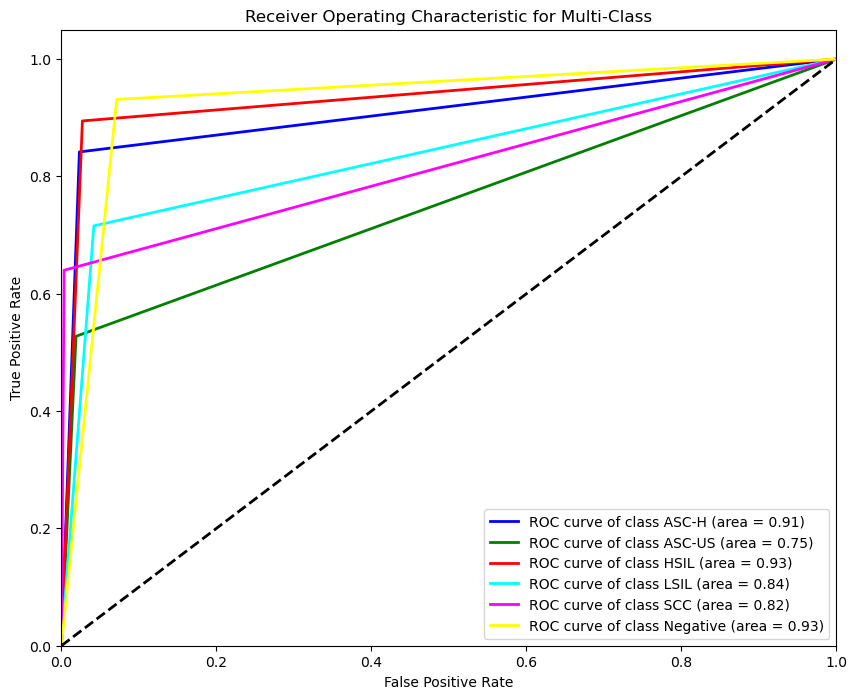

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import tensorflow as tf

# Define lesion classes and their associated labels
lesion_classes = ['ASC-H', 'ASC-US', 'HSIL', 'LSIL', 'SCC', 'Negative']
num_classes = len(lesion_classes)

# Assuming `y_true_combined` are your true labels and `y_pred_combined_proba` are your model's predicted probabilities
y_true_combined_one_hot = tf.keras.utils.to_categorical(y_true_combined, num_classes)

# Generate ROC curve for each class
colors = cycle(['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'indigo', 'pink', 'lightblue'])
plt.figure(figsize=(10, 8))

for i, color in zip(range(num_classes), colors):
    fpr, tpr, _ = roc_curve(y_true_combined_one_hot[:, i], y_pred_combined_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(lesion_classes[i], roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()